# Perceptron as a binary classifier

In [ ]:
raise SystemExit("Stop right there!");

<a id="importing"></a>
## Importing libraries and packages

In [36]:
# System
import os

# Mathematical operations and data manipulation
import pandas as pd

# Modelling
import tensorflow as tf

# Statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Plotting
import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

<a id="set-paths"></a>
## Set paths

In [38]:
# Path to datasets directory
data_path = "./datasets"
# Path to assets directory (for saving results to)
assets_path = "./assets"

<a id="loading-data"></a>
## Loading dataset

In [39]:
dataset = pd.read_csv(f"{data_path}/data.csv")

In [40]:
dataset.head()

label      x1      x2
0      1  2.6487  4.5192
1      1  1.5438  2.4443
2      1  1.8990  4.2409
3      1  2.4711  5.8097
4      1  3.3590  6.4423

The data has three columns. x1 and x2 are the features, and the label column contains the labels 0 or 1.

<a id="exploring-data"></a>
## Exploring dataset

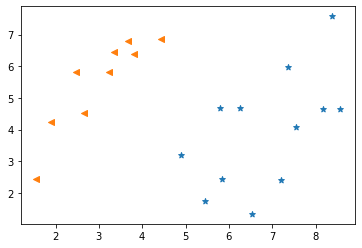

In [41]:
plt.scatter(
    dataset[dataset["label"] == 0]["x1"],
    dataset[dataset["label"] == 0]["x2"],
    marker="*",
)
plt.scatter(
    dataset[dataset["label"] == 1]["x1"],
    dataset[dataset["label"] == 1]["x2"],
    marker="<",
)

<a id="model"></a>
## Training of the perceptron

In [42]:
# Split into features and labels. Convert values at the end into
# matrix format
x_input = dataset[["x1", "x2"]].values
y_label = dataset[["label"]].values

In [43]:
# Creating TensorFlow variables for features and labels and
# typecasting them to float
x = tf.Variable(x_input, dtype=tf.float32)
y = tf.Variable(y_label, dtype=tf.float32)

In [44]:
# Training of the perceptron
Number_of_features = 2
Number_of_units = 1
learning_rate = 0.01

# Weights and bias
weight = tf.Variable(tf.zeros([Number_of_features, Number_of_units]))
bias = tf.Variable(tf.zeros([Number_of_units]))

# Optimizer
optimizer = tf.optimizers.SGD(learning_rate)

In [45]:
def perceptron(xx):
    z = tf.add(tf.matmul(xx, weight), bias)
    output = tf.sigmoid(z)
    return output


def train(i):
    for n in range(i):
        loss = lambda: abs(
            tf.reduce_mean(
                tf.nn.sigmoid_cross_entropy_with_logits(
                    labels=y, logits=perceptron(x)
                )
            )
        )
        optimizer.minimize(loss, [weight, bias])


# Train the perceptron
train(1000)

<a id="statistics"></a>
## Statistics

In [46]:
tf.print(weight)

[[-0.844034076]
 [0.673354685]]


In [47]:
tf.print(bias)

[0.0593947768]


In [48]:
# Passing the input data to check whether the perceptron
# classifies it correctly
ypred = perceptron(x)
# Rounding off the output to convert it into binary format
ypred = tf.round(ypred)

In [49]:
# Measuring the accuracy
acc = accuracy_score(y.numpy(), ypred.numpy())
print(acc)

1.0


In [50]:
# Performance measurement of the model
cnf_matrix = confusion_matrix(y.numpy(), ypred.numpy())
print(cnf_matrix)

[[12  0]
 [ 0  9]]
